In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

# Load breast cancer dataset
cancer = datasets.load_breast_cancer(as_frame=True)
df = cancer.frame

# Consider all 30 features at once
X = df.drop(columns="target").values
y = df['target'].values
y = np.where(y == 0, 1, 0)

In [201]:
class SingleNeuron:
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function
        self.weights = None
        self.errors = []
        self.bias = 0
    def train(self, X, y, alpha=0.005,epochs=50):
        self.weights = np.random.randn(X.shape[1])
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi,target in zip(X,y):
                error = self.predict(xi) - target
                self.weights -= alpha * error * xi
                self.bias -= alpha * error
                errors += self.cost_function(self.predict(xi), target)
            self.errors.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.weights) + self.bias
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize=(10,8))
        # Ignore random initialization of the cost function, start 100 epochs in
        axs.plot(range(100, len(self.errors) + 1), self.errors[99:], label = 'Cost Function')
        axs.set_xlabel('epochs', fontsize = 15)
        axs.set_ylabel('cost', fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title ('Cost Evolution per Epoch', fontsize = 18)
        plt.show()

    def plot_decison_boundaries(self, X, y, xstring='x',ystring='y'):
        plt.figure(figsize=(10,8))
        plot_decision_regions(X, y, clf=self)
        plt.title("Decision Boundary",fontsize=18)
        plt.xlabel(xstring, fontsize=15)
        plt.ylabel(ystring, fontsize=15)
        plt.show()


In [204]:
# The Logistic Regression uses the sigmoid function as its activation function, and uses the
# cross entropy loss function as its cost function. To avoid issues with log(0) and calculating
# the sigmoid function of large values, the values are fixed when too large/small.

def sigmoid(z):

    z = np.clip(z, -100, 100)
    return 1.0/(1.0+np.exp(-z))

def cross_entropy_loss(y_hat, y):
    if y_hat > 0.9999999:
        y_hat = 0.9999999
    elif y_hat < 0.0000001:
        y_hat = 0.0000001
    return -y * np.log(y_hat) - (1.0 - y) * np.log(1.0 - y_hat)

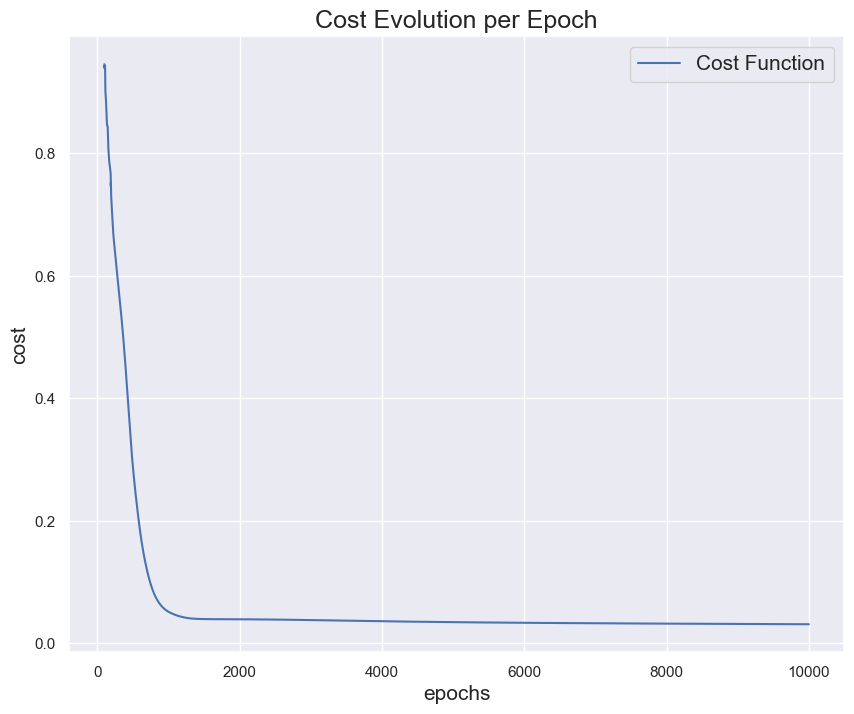

In [215]:
node = SingleNeuron(sigmoid, cross_entropy_loss).train(X, y, alpha=0.000005, epochs=10000)

node.plot_cost_function()

In [235]:
# Error Analysis
print("Total Error = " + str(float(sum(y-node.predict(X)))))
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Total Error = 31.937147992906223
Classification Error = 0.070298769771529


Conclusion:
The logistic regression model has some clear benefits when compared to the perceptron model. Both models intend to separate data into binary classes, but the logistic regression outputs a probability that a certain data point is in a given class, rater than just a prediction. This is much more valuable information than just a prediction, because it provides more information. In the perceptron mode, we can be no more sure about one prediction than other, so even though the predictions might be right a large majority of the time, we cannot trust any prediction more or less than another. This forces us to be equally distrusting of every prediction equally. This whole issue is avoided with the logistic regression, because it outputs a probability, so we can know which prediction to me more and less sure of. Essentially no accuracy is lost when we compare it to the perceptron model. Using all 30 data features, the perceptron model made an incorrect prediction 32 times. In the logistic regression, the sum of the difference between the correct classification and the predicted probability of being in that class is 31.9, which is about the same. The classification error, which converts probabilities to binary predictions, is 0.07, which corresponds to 40 incorrect predictions. This is slightly worse than 32, but as a tradeoff, it is more clear when a prediction might be wrong, as the predicted probability will be close to 50/50, so it would be a bad idea to blindly trust such predictions.